# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     589.4
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.07e-36
Time:                        23:15:08   Log-Likelihood:                -10.684
No. Observations:                  50   AIC:                             29.37
Df Residuals:                      46   BIC:                             37.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0185      0.106     47.136      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.51662894  4.9956418   5.43591859  5.81067762  6.10280258  6.30765467
  6.4338348   6.50177041  6.54035938  6.58222214  6.65834222  6.79297579
  6.99966638  7.27901977  7.61860443  7.99499399  8.37761614  8.73377556
  9.03402567  9.25700664  9.39295469  9.44530635  9.43013375  9.37350408
  9.30719678  9.26348231  9.26982016  9.34434739  9.49289869  9.70804783
  9.97032771 10.2514288  10.51885026 10.74123978 10.89354467 10.96112793
 10.94217308 10.84798258 10.70112091 10.53170726 10.37246702 10.25335513
 10.19663454 10.21321847 10.30087742 10.44460545 10.61908562 10.79284949
 10.9334473  11.01277937]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.99941229 10.85607316 10.60203342 10.28121025  9.95141413  9.67019478
  9.48075102  9.40135416  9.42087459  9.50150663]


## Plot comparison

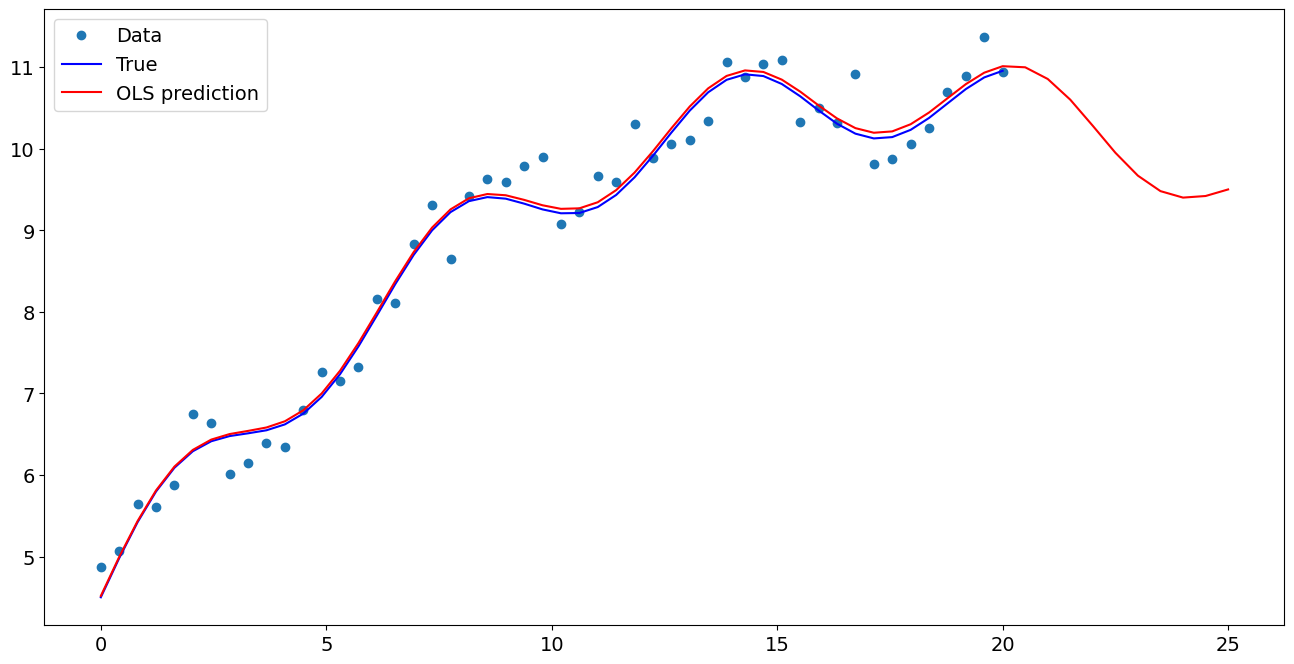

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.018524
x1                  0.503134
np.sin(x1)          0.491415
I((x1 - 5) ** 2)   -0.020076
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.999412
1    10.856073
2    10.602033
3    10.281210
4     9.951414
5     9.670195
6     9.480751
7     9.401354
8     9.420875
9     9.501507
dtype: float64